# Screening Companies with Python
***

Welcome to the **Screening Companies with Python** tutorial. In this notebook, we will review the output of a FactSet **Universal Screen (US)** and begin manipulating the data with Python.


## Universal Screen Review
***

Before working with the data, we need to get comfortable with the parameters and file format. We'll start by viewing the parameters of the **US**.

<img src="./images/screening_parameters.png" width="750" align="center">

#### The parameters of this screen include:

1. Symbol
2. Proper Name
3. Net Sales - most recent reported fiscal year
4. Net Sales - one fiscal year prior to the most recently reported 
5. Earnings Per Share (EPS) - most recent reported fiscal year
6. Earnings Per Share (EPS) - one fiscal year prior to the most recently reported 
7. Indicated Dividend Yield (DY)
8. FactSet Sector Name
9. Current sales greater than previous years sales
10. Current EPS greater than previous years EPS
11. DY greater than .5


## Import Data
***

Now that we're comfortable with the contents of the **US** output, let's import the data using the `read_csv` method from the `pandas` module. We'll begin by importing `pandas` and declaring the name and location of the screening output.

In [1]:
import os
os.getcwd()

'C:\\Users\\pgadi\\OneDrive - FactSet\\Desktop\\Coding'

In [2]:
import pandas as pd

# Define the file location & name
path = './Inputs/'
file_name = 'Full Universe CSV.csv'

# Read data
data = pd.read_csv(path + file_name, header=None)

# Preview data
data.head(8)

,0,1,2,3,4,5,6,7
0,FactSet Universal Screening,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Symbol,Name,Sales Y0,Sales Y-1,EPS Y0,EPS Y-1,Ind Annual Div Rate,FactSet Sector Name
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MMM,3M Company,32136,32765,7.8,8.9,5.9,Producer Manufacturing
7,AOS,A. O. Smith Corporation,2992.7,3187.9,2.2,2.6,1,Producer Manufacturing


Let's review the data we've just read into memory. 

* The intersection of row zero and column zero says **FactSet Universal Screening**
* Headers, or column names, begin on row 4
* Data begins on row 6

This result makes sense after referring back to the csv output generated by **US**.


<img src="./images/csv_preview.png" width="750" align="center">

Luckily, there are parameters within the `read_csv` method that can help us account for files with varying formats. Let's try reading this file in again after using the `skip_rows` parameter.

In [3]:
# Read data
data = pd.read_csv(path + file_name, header=None, skiprows=6)

# Preview data
data.head()

,0,1,2,3,4,5,6,7
0,MMM,3M Company,32136.0,32765.0,7.8,8.9,5.9,Producer Manufacturing
1,AOS,A. O. Smith Corporation,2992.7,3187.9,2.2,2.6,1.0,Producer Manufacturing
2,ABT,Abbott Laboratories,31904.0,30578.0,2.1,1.3,1.4,Health Technology
3,ABBV,"AbbVie, Inc.",33266.0,32753.0,5.3,3.7,4.7,Health Technology
4,ABMD,"ABIOMED, Inc.",840.9,769.4,4.4,5.6,0.0,Health Technology


That looks much better. 

Now we should give this `pandas.DataFrame` new column names so we know what we're looking at.

In [4]:
# Declare new column names
column_names = [
    "symbol",
    "name",
    "current_fy_sales",
    "prev_fy_sales",
    "current_fy_eps",
    "prev_fy_eps",
    "div_yld",
    "sector",
]

# Rename columns
data.columns = column_names

# Preview data
data.head()

,symbol,name,current_fy_sales,prev_fy_sales,current_fy_eps,prev_fy_eps,div_yld,sector
0,MMM,3M Company,32136.0,32765.0,7.8,8.9,5.9,Producer Manufacturing
1,AOS,A. O. Smith Corporation,2992.7,3187.9,2.2,2.6,1.0,Producer Manufacturing
2,ABT,Abbott Laboratories,31904.0,30578.0,2.1,1.3,1.4,Health Technology
3,ABBV,"AbbVie, Inc.",33266.0,32753.0,5.3,3.7,4.7,Health Technology
4,ABMD,"ABIOMED, Inc.",840.9,769.4,4.4,5.6,0.0,Health Technology


## Explore the Results
***

This stage of the analytical process is often referred to as _Exploratory Data Analysis_, or EDA for short. One goal of EDA is to gain comfort with the dataset before analyzing it further. To do that, we'll perform the following steps: 

1. Check the variable types
2. Display descriptive statistics
3. Identify missing values & outliers
4. Plot variable relationships

**1. Check variable types** 

The `info` method provides a concise summary of the dataset. The data types (Dtype) align with our intuition, in that the numeric columns are assigned as floats and strings as objects. In addition to the dtypes, we can see how many rows and columns are present and even identify missing values (Non-Null Count).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symbol            500 non-null    object 
 1   name              500 non-null    object 
 2   current_fy_sales  500 non-null    float64
 3   prev_fy_sales     500 non-null    float64
 4   current_fy_eps    499 non-null    float64
 5   prev_fy_eps       498 non-null    float64
 6   div_yld           498 non-null    float64
 7   sector            500 non-null    object 
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


**2. Display descriptive statistics**

`describe` generates descriptive statistics. This method highlights measures of central tendency, dispersion, and more. One glaring observation here has to deal with the units being measured for each field. The sales fields are orders of magnitude larger than eps and dividend yield. If we plan on combining these fields or making direct comparisons, we may have to treat the data first.

In [6]:
data.describe()

,current_fy_sales,prev_fy_sales,current_fy_eps,prev_fy_eps,div_yld
count,500.00000,500.000000,499.000000,498.00000,498.000000
mean,24979.32780,24005.752600,5.716232,5.26506,1.741365
std,46678.88213,44534.356907,12.654842,10.68626,1.802897
min,511.40000,435.600000,-20.800000,-16.40000,0.000000
25%,4835.00000,4404.750000,2.100000,2.00000,0.400000
50%,10201.50000,9931.800000,3.900000,3.70000,1.400000
75%,21514.50000,21028.150000,6.300000,5.90000,2.500000
max,523964.00000,514405.000000,221.100000,194.80000,14.500000


**3. Identify Missing values**

There are very few missing values in this dataset and thus no need to replace them.

In [7]:
data.isnull().sum().sort_values(ascending=False)

div_yld             2
prev_fy_eps         2
current_fy_eps      1
sector              0
prev_fy_sales       0
current_fy_sales    0
name                0
symbol              0
dtype: int64

**3. Identify outliers**

Below is a [boxplot](https://en.wikipedia.org/wiki/Box_plot) of our sales, eps, and dividend yield fields. This plot will help us identify any outliers present within our data. Looking at the first plot of sales, we can see several sales figures that may be considered outliers. 

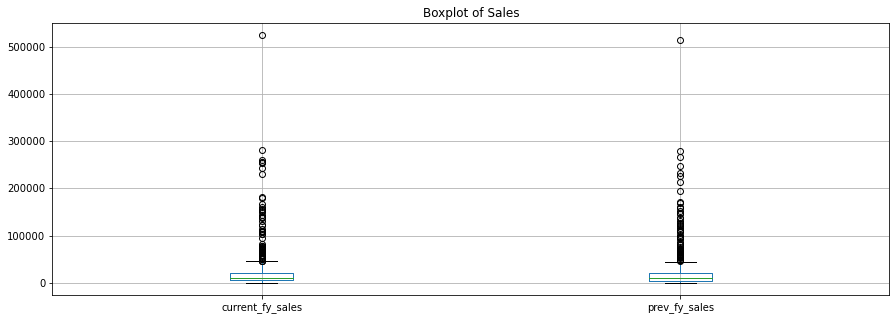

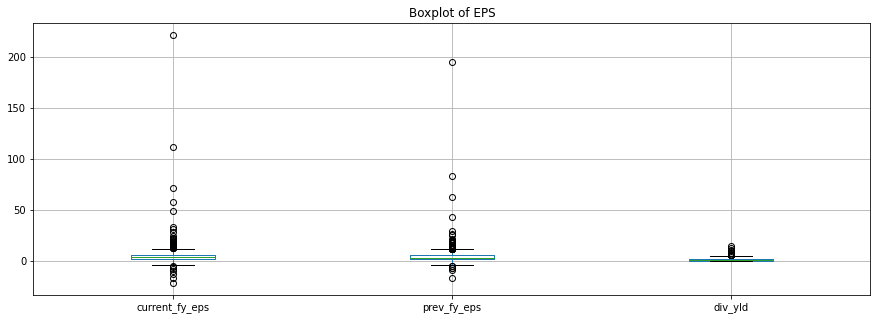

In [8]:
import warnings 
import matplotlib.pyplot as plt
%matplotlib inline

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    data[['current_fy_sales', 'prev_fy_sales']].boxplot(
        figsize=(15, 5)
    )
    plt.title('Boxplot of Sales')
    plt.show()
    
    data[['current_fy_eps', 'prev_fy_eps', 'div_yld']].boxplot(
        figsize=(15, 5)
    )
    plt.title('Boxplot of EPS')
    plt.show()

**4. Plot relationships**

Apart from identifying outliers and analyzing statistics, it can often be helpful to plot the distribution of values to learn more about our dataset.

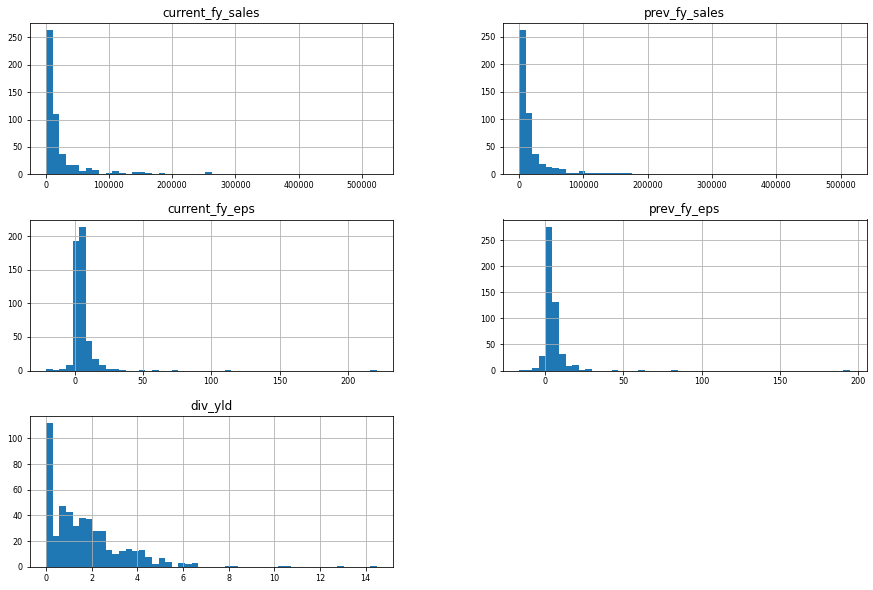

In [9]:
data.hist(bins=50, figsize=(15, 10), xlabelsize=8, ylabelsize=8)
plt.show()

In addition to the histograms above, a scatter plot can be used to identify the relationship between two variables. Here's what we see:

* On average current sales and EPS values are highly correlated with past years results. 
* There's also a positive correlation between EPS and dividend yield.

The `pairplot` method from `seaborn` is a popular (and easy!) option.

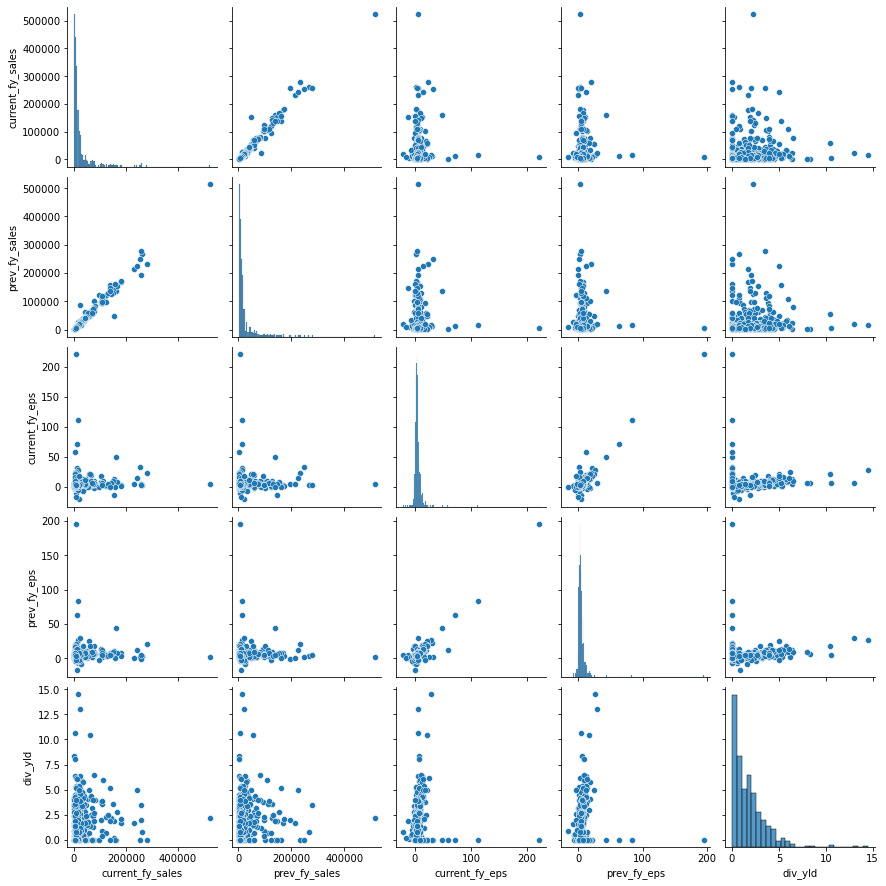

In [10]:
import seaborn as sns

sns.pairplot(data);

## Screening
***

This section focuses screening companies using Python. Before creating a series of filters to narrow the dataset down to the companies of interest, we'll carry out the following steps:

1. Compute growth features for sales and eps
2. Discretize both growth features 
3. Create queries to analyze subsets of the universe

**1. Compute growth features for sales and eps**

In [11]:
def percent_change(prev_col, new_col):
    """
    prev_col: str
        Column name associated with the previous value
    new_col: str
        Column name associated with the new value
    """
    pct_change = data[[prev_col, new_col]].pct_change(axis="columns")[new_col]
    return pct_change


# Create growth features
data["sls_growth_1yr"] = percent_change(
    prev_col="prev_fy_sales", new_col="current_fy_sales"
)
data["eps_growth_1yr"] = percent_change(
    prev_col="prev_fy_eps", new_col="current_fy_eps"
)


**2. Discretize growth features**

Discretize values into 3 buckets from low (1) to high (3)

In [12]:
data["sls_growth_1yr_q"] = pd.qcut(data["sls_growth_1yr"], q=3, labels=range(1, 4))
data["eps_growth_1yr_q"] = pd.qcut(data["eps_growth_1yr"], q=3, labels=range(1, 4))

**3. Create queries to analyze subsets of the universe**

In the cells below we have a function, `query_results`, and a series of queries that will be used to screen companies out of the dataset.

The `query_results` function requires on parameter - `query` - which it uses to filter the dataset to companies meeting the criteria of that query. Once we've arrived at the final subset, the function returns:

* The number of companies passing the screen
* The median 1 year sales and EPS growth rates
* A bar plot displaying the number of companies passing the screen by RBICS Economy

In [13]:
def query_results(query):
    """
    query: str
        Returns the number of companies passing returned by the query
    """
    result = data.query(expr=query)
    median_sls_growth = result["sls_growth_1yr"].median()
    median_eps_growth = result["eps_growth_1yr"].median()
    count_by_sector = result.groupby("sector").size().sort_values(ascending=False)
    msg = (
        f'There are {len(result)} companies passing this screen\n'
        f'Median 1yr sales growth: {median_sls_growth:.2%}\n'
        f'Median 1yr eps growth: {median_eps_growth:.2%}'
    )
    print(msg)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(count_by_sector, count_by_sector.index, ax=ax)
    ax.set_title("Count by Sector")

The first query, `high_sales_high_eps`, narrows down the dataset to companies growing sales and EPS in the top 33% of the universe. The goal is to identify high growth companies.

There are 69 companies passing this screen
Median 1yr sales growth: 12.25%
Median 1yr eps growth: 33.90%


C:\Users\pgadi\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


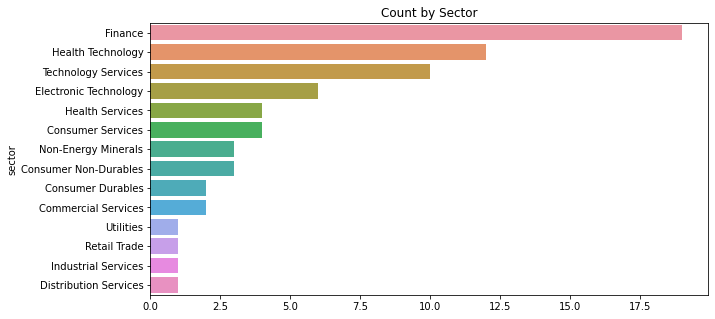

In [14]:
high_sales_high_eps = "sls_growth_1yr_q == 3 & eps_growth_1yr_q == 3"

query_results(query=high_sales_high_eps)

The second query, `high_sales_low_eps`, narrows down the dataset to companies growing sales in the top 33% and EPS in the bottom 33% of the universe. The goal is to identify companies growing the top line but failing to convert that same growth to the bottom line.

There are 41 companies passing this screen
Median 1yr sales growth: 16.46%
Median 1yr eps growth: -40.00%


C:\Users\pgadi\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


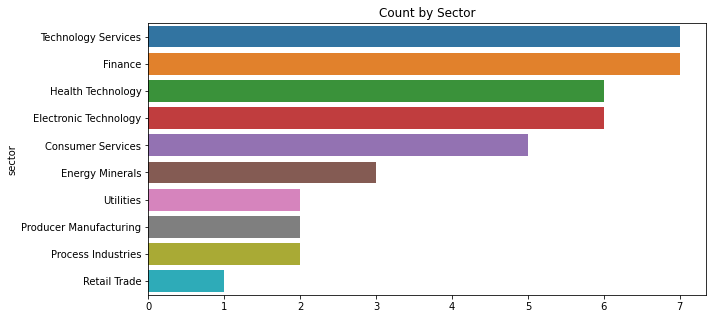

In [15]:
high_sales_low_eps = "sls_growth_1yr_q == 3 & eps_growth_1yr_q == 1"

query_results(query=high_sales_low_eps)

The third query, `low_sales_high_eps`, narrows down the dataset to companies growing sales in the bottom 33% and EPS in the top 33% of the universe. The goal is to identify companies with low sales growth rates but high EPS growth rates, potentially signaling operational efficiency or share buyback programs. 

There are 29 companies passing this screen
Median 1yr sales growth: -3.54%
Median 1yr eps growth: 51.11%


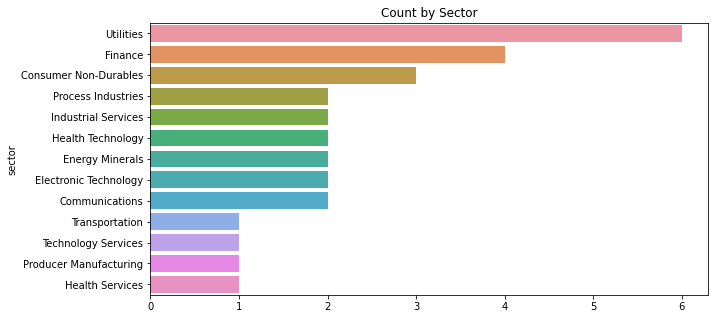

In [15]:
low_sales_high_eps = "sls_growth_1yr_q == 1 & eps_growth_1yr_q == 3"

query_results(query=low_sales_high_eps)

The fourth query, `low_sales_low_eps`, narrows down the dataset to companies growing sales in the bottom 33% and EPS in the bottom 33% of the universe. The goal is to identify slow growth companies as potential short candidates.

There are 89 companies passing this screen
Median 1yr sales growth: -5.31%
Median 1yr eps growth: -36.36%


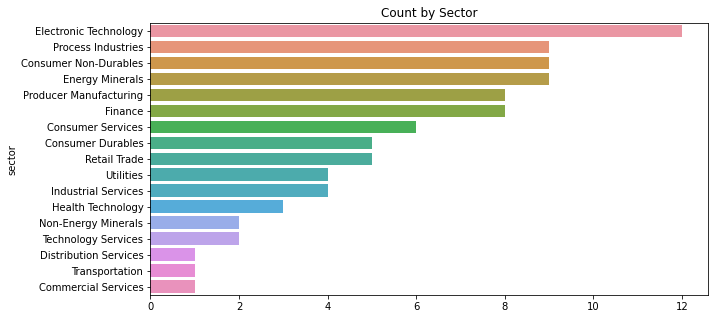

In [16]:
low_sales_low_eps = "sls_growth_1yr_q == 1 & eps_growth_1yr_q == 1"

query_results(query=low_sales_low_eps)